<a href="https://colab.research.google.com/github/Sheshikumar1/house-price-prediction/blob/main/Bostan_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("BostonHousing.CSV")

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


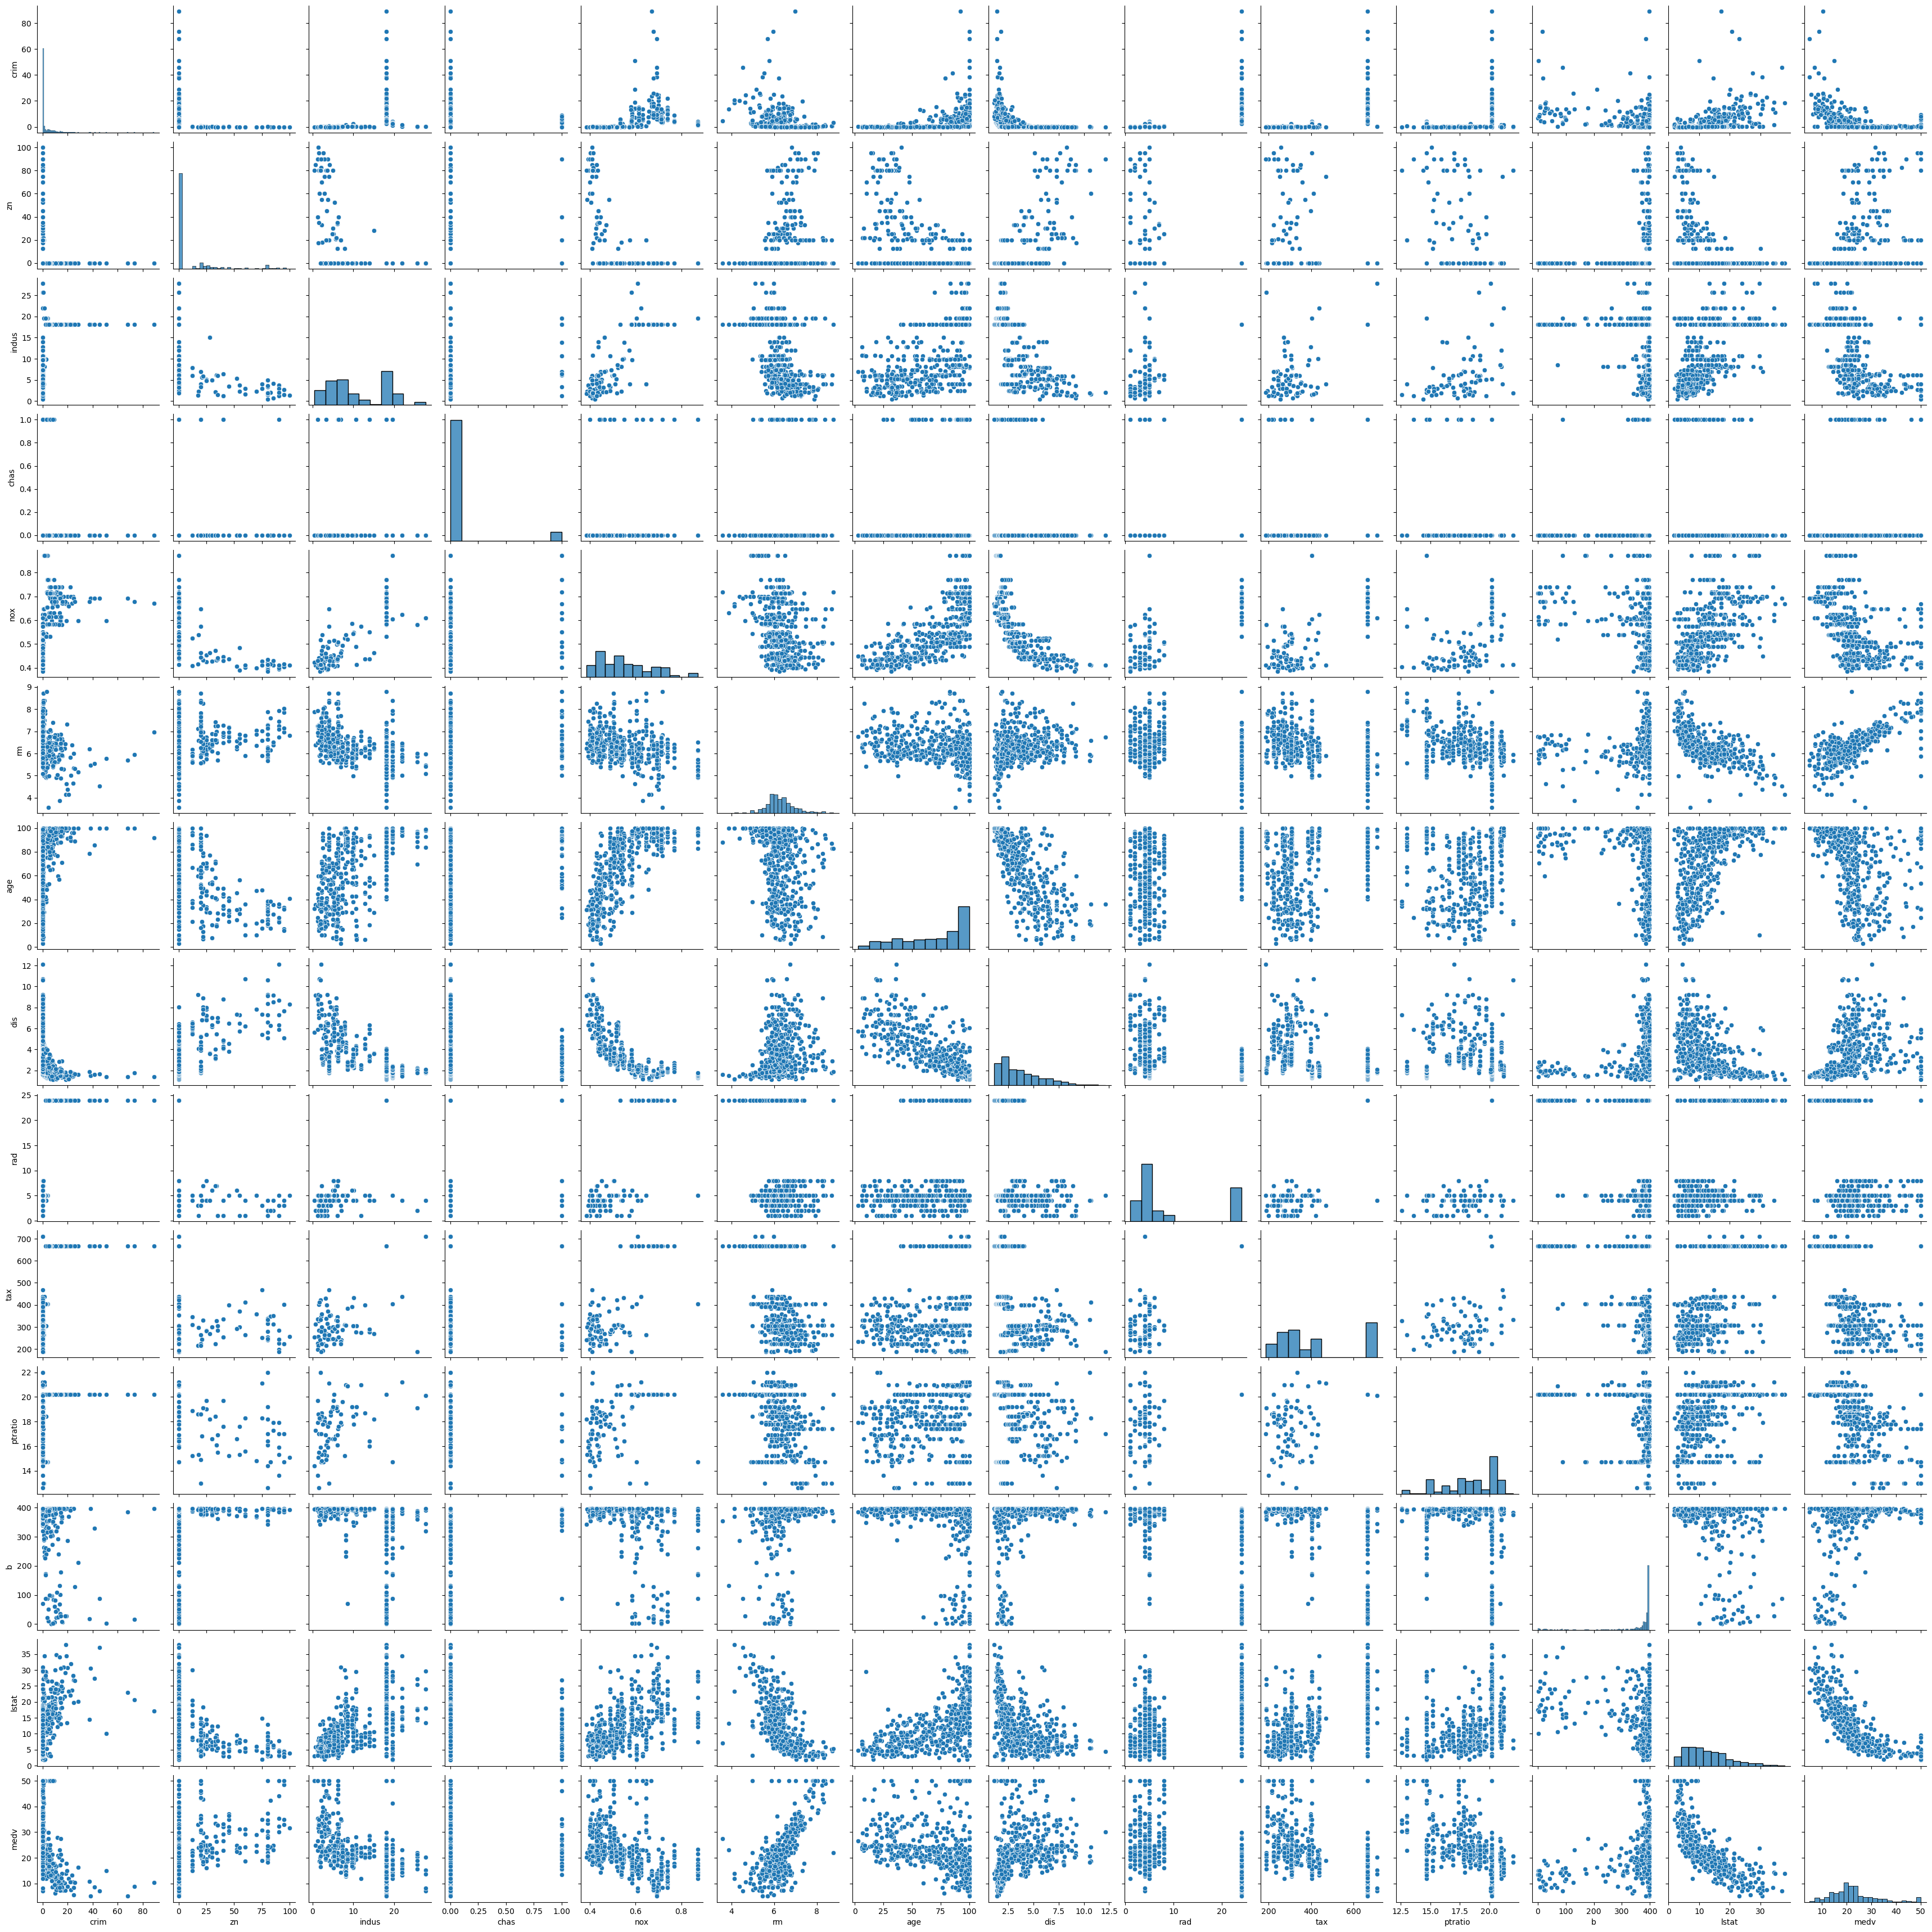

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
col_study=['zn','indus','nox','rm']

C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


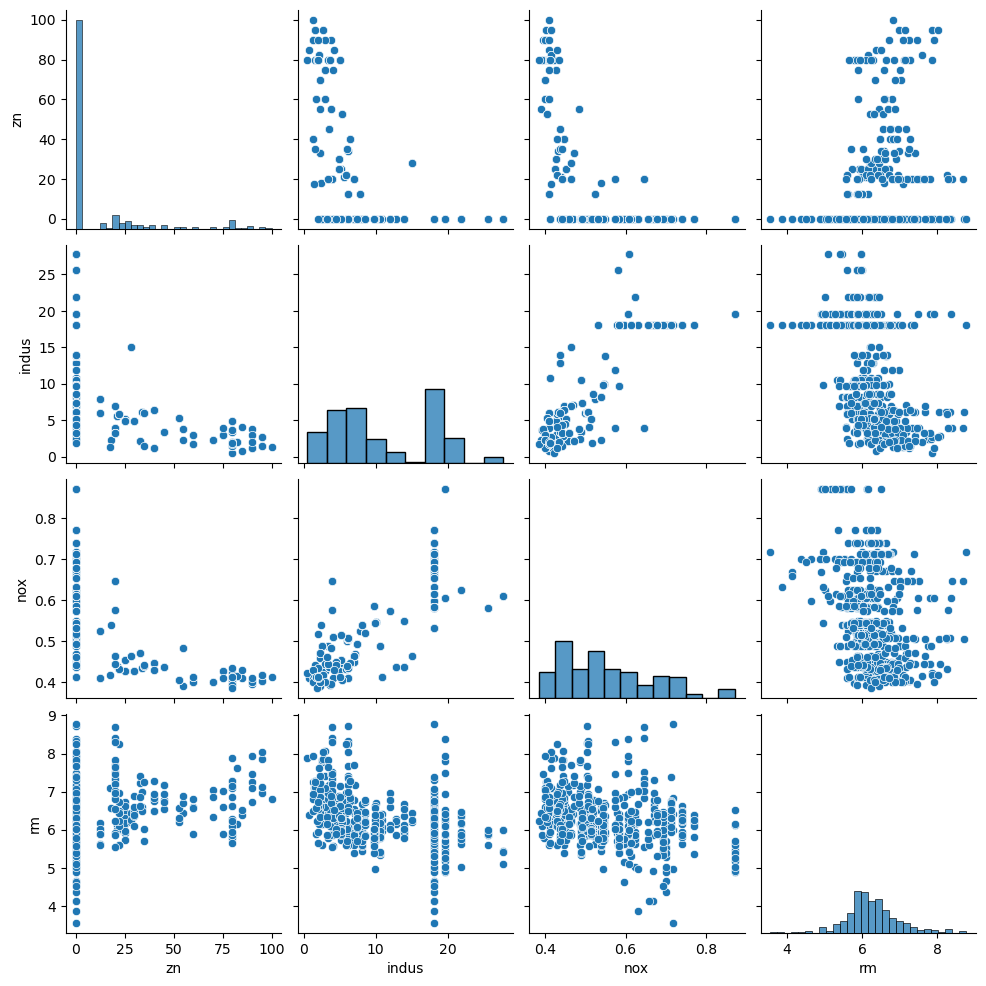

In [ ]:
sns.pairplot(df[col_study],height=2.5)
plt.show()

# corelation and feature seletion

In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219433,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311173,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394193,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091468,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302751,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240286,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.203507,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210718,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292794,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


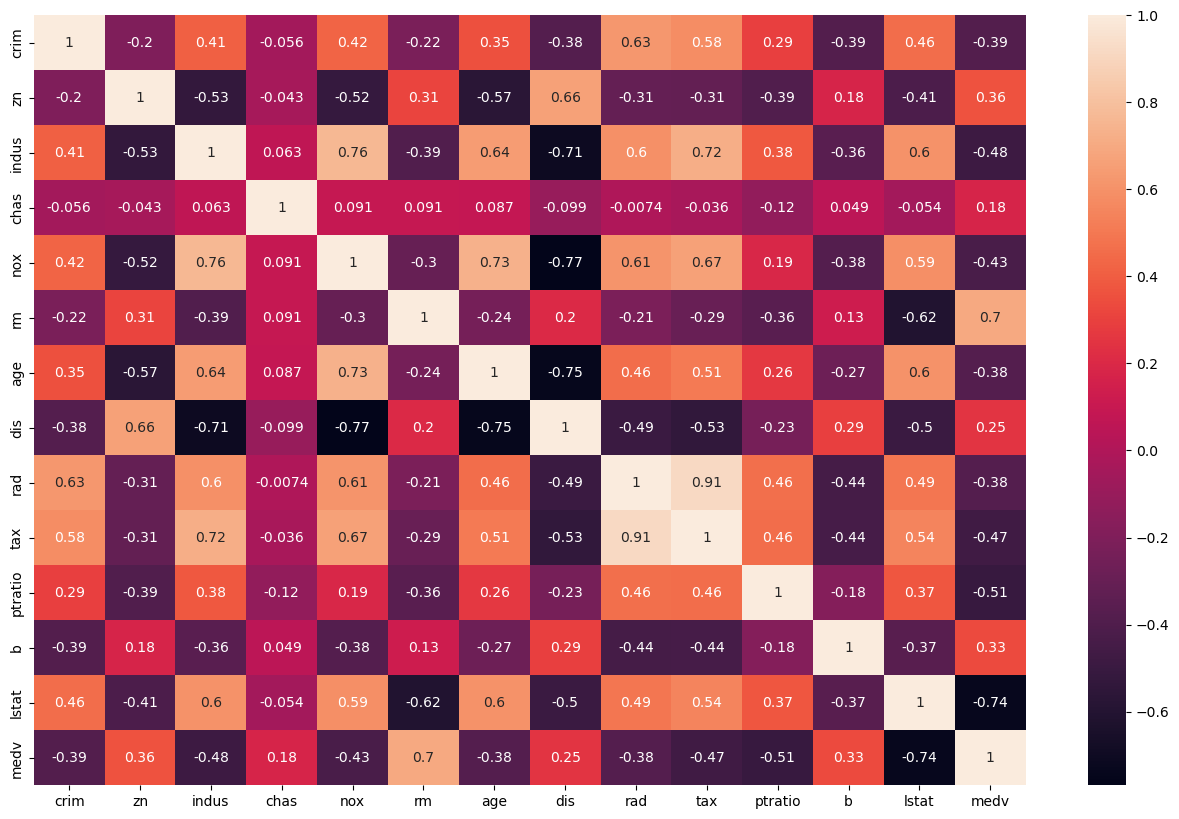

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

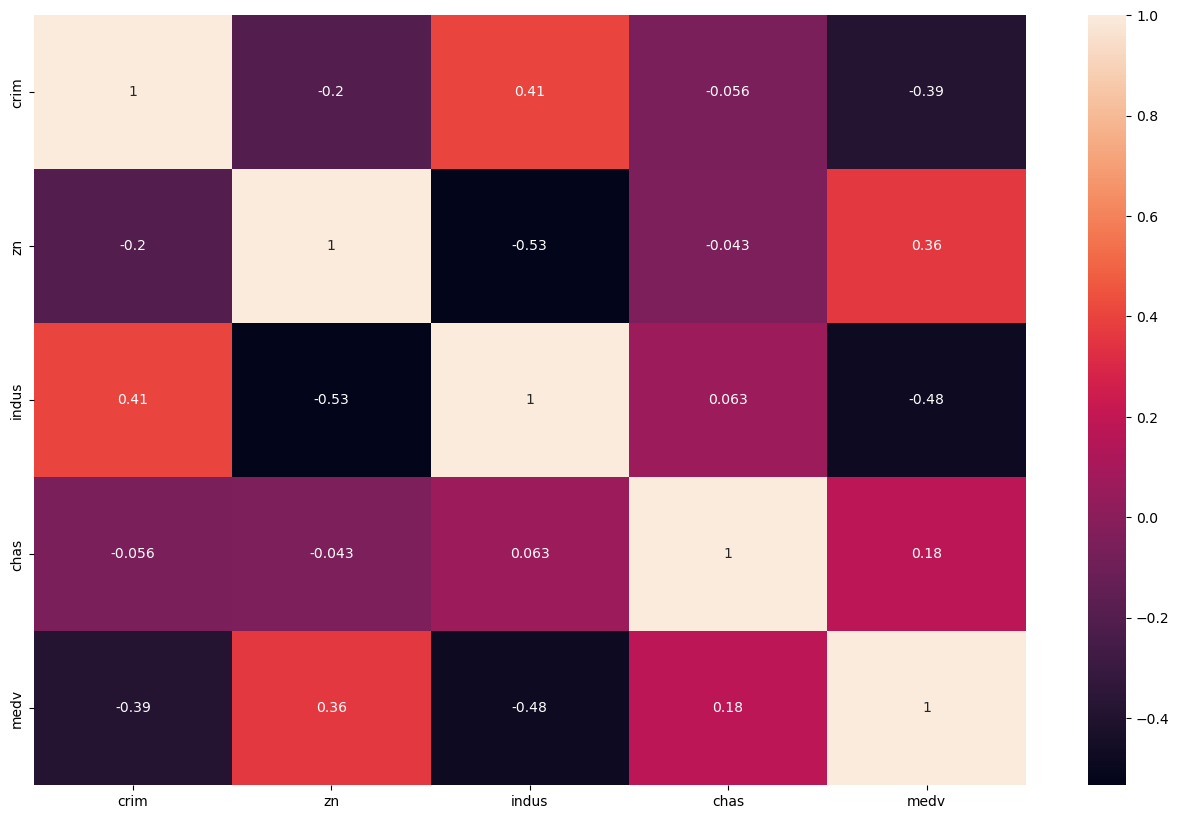

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['crim','zn','indus','chas','medv']].corr(),annot=True)
plt.show()

## Linear Regression

In [ ]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X=df['dis'].values.reshape(-1,1)

In [ ]:
y=df['medv'].values

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([1.09161302])

In [ ]:
model.intercept_

18.390088330493388

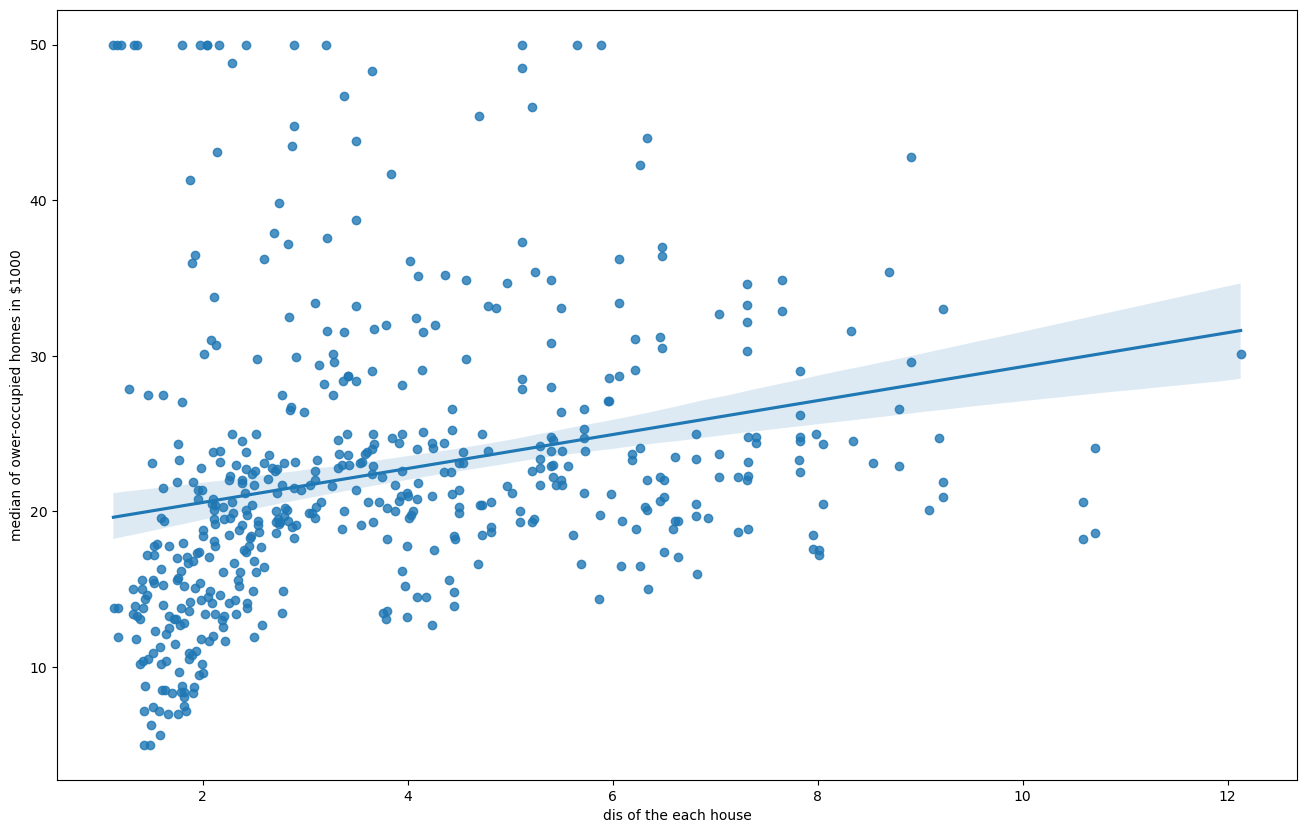

In [ ]:
plt.figure(figsize=(16,10));
sns.regplot(x=X,y=y);
plt.xlabel("dis of the each house");
plt.ylabel("median of ower-occupied homes in $1000");
plt.show()

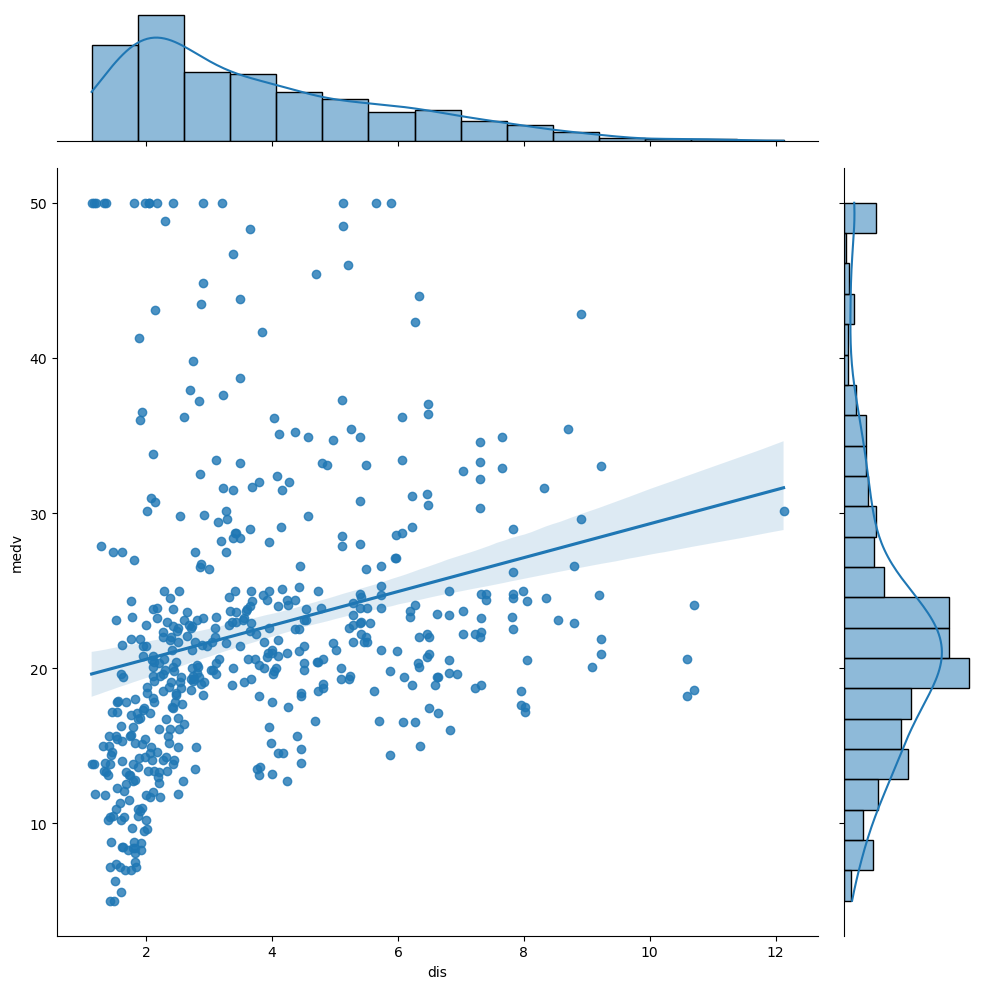

In [ ]:
sns.jointplot(x="dis",y="medv",data=df,kind='reg',height=10)
plt.show()

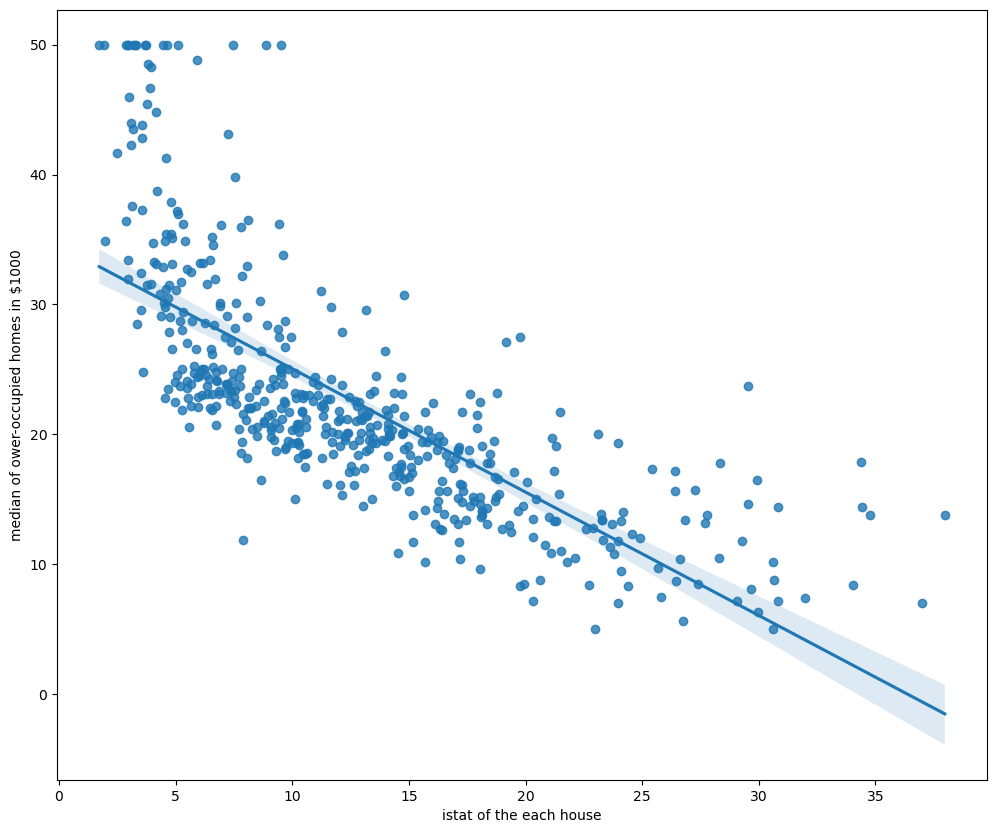

In [ ]:
X=df['lstat'].values.reshape(-1,1)
y=df['medv'].values
model.fit(X,y)
plt.figure(figsize=(12,10));
sns.regplot(x=X,y=y);
plt.xlabel("istat of the each house");
plt.ylabel("median of ower-occupied homes in $1000");
plt.show()

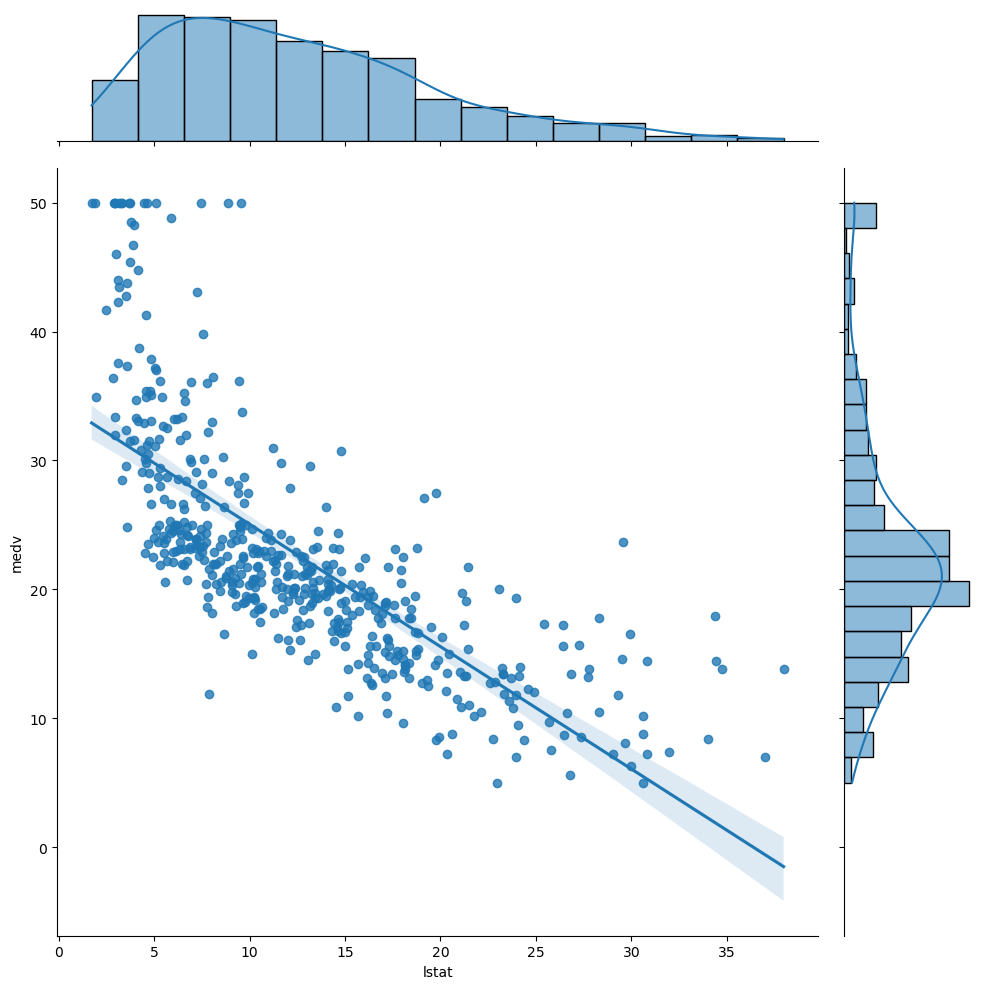

In [ ]:
sns.jointplot(x="lstat",y="medv",data=df,kind='reg',height=10)
plt.show()

In [ ]:
X=df['dis'].values.reshape(-1,1)
y=df['medv'].values

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor()
ransac.fit(X,y)

RANSACRegressor()

In [ ]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [ ]:
Line_x=np.arange(3,10,1)
line_Y_ransac=ransac.predict(Line_x.reshape(-1,1))

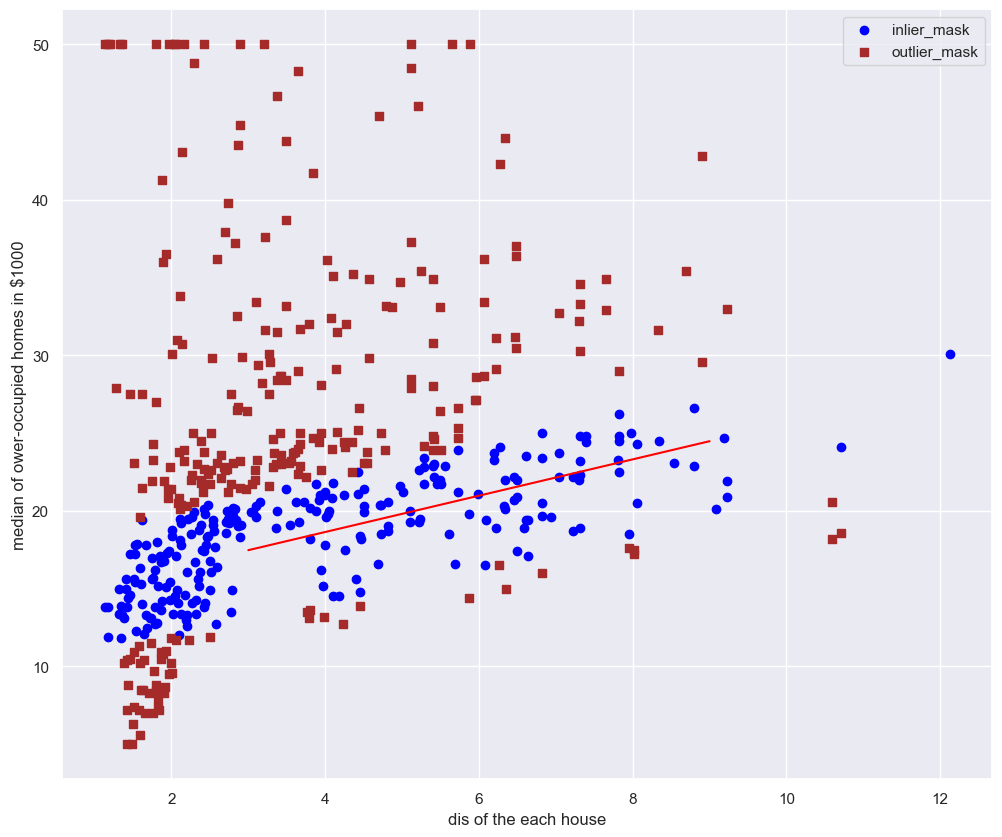

In [ ]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='inlier_mask')
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='outlier_mask')
plt.plot(Line_x,line_Y_ransac,c='red')
plt.xlabel("dis of the each house");
plt.ylabel("median of ower-occupied homes in $1000");
plt.legend(loc='upper right')
plt.show()

In [ ]:
ransac.estimator_.coef_

array([1.1675977])

In [ ]:
ransac.estimator_.intercept_

13.97355070761888

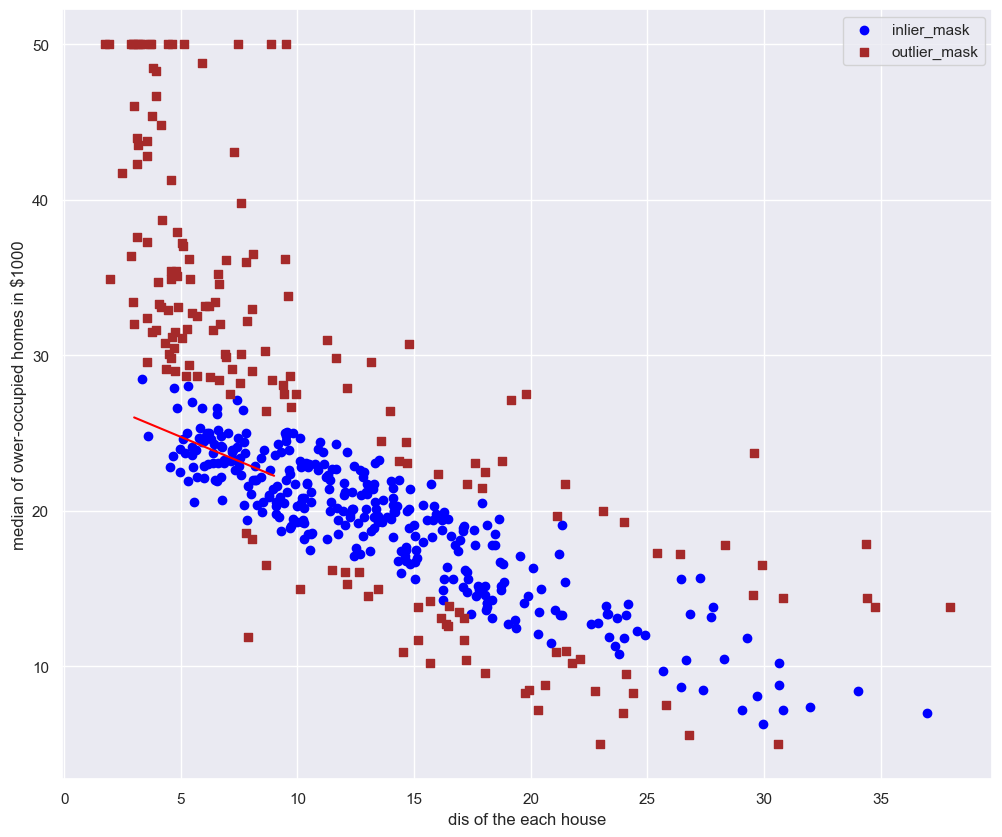

In [ ]:
X=df['lstat'].values.reshape(-1,1)
y=df['medv'].values
ransac.fit(X,y)
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
Line_x=np.arange(3,10,1)
line_Y_ransac=ransac.predict(Line_x.reshape(-1,1))
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='inlier_mask')
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='outlier_mask')
plt.plot(Line_x,line_Y_ransac,c='red')
plt.xlabel("dis of the each house");
plt.ylabel("median of ower-occupied homes in $1000");
plt.legend(loc='upper right')
plt.show()